In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")


In [8]:
colnames=["Patient","label",'DN_HistogramMode_5',
  'DN_HistogramMode_10',
  'CO_f1ecac',
  'CO_FirstMin_ac',
  'CO_HistogramAMI_even_2_5',
  'CO_trev_1_num',
  'MD_hrv_classic_pnn40',
  'SB_BinaryStats_mean_longstretch1',
  'SB_TransitionMatrix_3ac_sumdiagcov',
  'PD_PeriodicityWang_th0_01',
  'CO_Embed2_Dist_tau_d_expfit_meandiff',
  'IN_AutoMutualInfoStats_40_gaussian_fmmi',
  'FC_LocalSimple_mean1_tauresrat',
  'DN_OutlierInclude_p_001_mdrmd',
  'DN_OutlierInclude_n_001_mdrmd',
  'SP_Summaries_welch_rect_area_5_1',
  'SB_BinaryStats_diff_longstretch0',
  'SB_MotifThree_quantile_hh',
  'SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1',
  'SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1',
  'SP_Summaries_welch_rect_centroid',
  'FC_LocalSimple_mean3_stderr']

In [45]:
folderpath = r"C:\Users\colek\Downloads\mybox-selected (2)\mybox-selected"
series_list = []
for path in os.listdir(folderpath):
    df = pd.read_csv(os.path.join(folderpath,path))
    df.insert(0,"Patient",path)
    series_list.append(df[["Patient","Milliseconds since session start","HR-HR(bpm)","RR-RR(rpm)","SpO2-O2(%)"]].iloc[0:3600])

In [46]:
patient_df = pd.concat(series_list)

In [47]:
patient_df.replace("?",np.nan,inplace=True)

In [48]:
patient_df.reset_index(drop=True,inplace=True)

In [52]:
patient_df.fillna(0,inplace=True)

In [53]:
patient_df[["HR-HR(bpm)","RR-RR(rpm)"]]=patient_df[["HR-HR(bpm)","RR-RR(rpm)"]].astype(int)

In [54]:
patient_df["SpO2-O2(%)"] = patient_df["SpO2-O2(%)"].astype(float)

In [59]:
patient_df.groupby("Patient").mean()

,Milliseconds since session start,HR-HR(bpm),RR-RR(rpm),SpO2-O2(%)
Patient,,,,
V001.csv,1.846384e+06,102.557500,43.028333,95.430833
V002.csv,1.845985e+06,142.424722,51.450833,97.132611
V003.csv,1.846063e+06,111.715556,43.306667,99.086028
V004.csv,1.845380e+06,132.561111,55.805833,97.924167
V005.csv,1.847275e+06,139.628889,41.091944,97.127361
...,...,...,...,...
V071.csv,1.846669e+06,133.644444,44.746389,95.150000
V072.csv,1.846274e+06,116.783333,35.848889,98.397222
V073.csv,1.846332e+06,142.060000,49.747778,95.939722


In [19]:
label_df = pd.read_csv("Vision_Patient_Target_Data.csv",usecols=[1,2])

In [107]:
df_list

[0       105.820292
 1       105.820292
 2       105.820292
 3       105.820292
 4       105.820292
            ...    
 3595    105.820292
 3596    105.820292
 3597    105.820292
 3598    105.820292
 3599    105.820292
 Name: HR-HR(bpm), Length: 3600, dtype: float64,
 0       151.0
 1       152.0
 2       152.0
 3       151.0
 4       151.0
         ...  
 3595    144.0
 3596    138.0
 3597    131.0
 3598    125.0
 3599    121.0
 Name: HR-HR(bpm), Length: 3600, dtype: float64,
 0       119.0
 1       119.0
 2       119.0
 3       119.0
 4       119.0
         ...  
 3595    121.0
 3596    121.0
 3597    120.0
 3598    120.0
 3599    119.0
 Name: HR-HR(bpm), Length: 3600, dtype: float64,
 0       177.0
 1       177.0
 2       176.0
 3       175.0
 4       173.0
         ...  
 3595    129.0
 3596    132.0
 3597    134.0
 3598    137.0
 3599    136.0
 Name: HR-HR(bpm), Length: 3600, dtype: float64,
 0       106.0
 1       105.0
 2       105.0
 3       108.0
 4        85.0
         ...  

In [109]:

import pandas as pd

rows = []

# Iterate over patient_list
for i, ID in enumerate(patient_list):
    start_time = 0
    stop_time = 600
    while stop_time <= 3600:
       
        
        # Slice the DataFrame for the given time window
        slice_df = df_list[i].iloc[start_time:stop_time]
        
        # Apply catch22_all and get the "values"
        catch22_values = ct.catch22_all(slice_df)["values"]
        
        # Create a row with ID, Label, and catch22 values
        row = [ID, label_list[i]] + list(catch22_values)
        
        # Append the row to the list
        rows.append(row)
        
        # Update the time window
        start_time = stop_time
        stop_time += 600

# Create the DataFrame
df = pd.DataFrame(rows, columns=colnames)


In [110]:
df = df.dropna()

In [113]:
X= df.drop(columns =[ "label","Patient"])
y= df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


<Figure size 640x480 with 0 Axes>

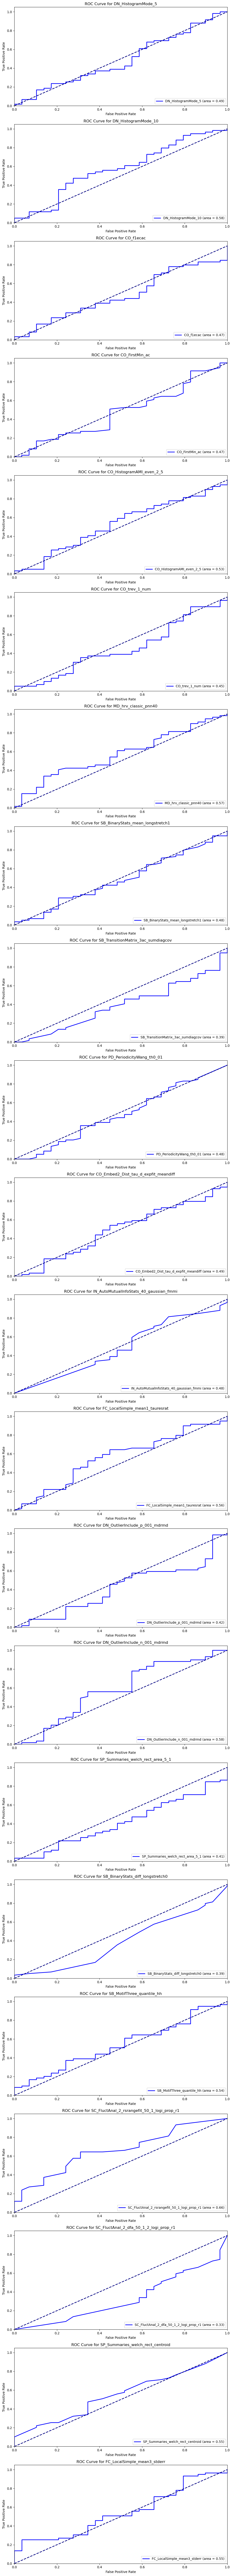

In [120]:
plt.figure()
colors = ['blue', 'green', 'red', 'cyan', 'magenta']
num_features = X_train.shape[1]
fig, axes = plt.subplots(nrows=num_features, figsize=(10, num_features * 5))
auc_for_each_feature = []
# Plot ROC curves for each feature in a separate subplot
for i in range(num_features):
    ax = axes[i]
    # Use the ith feature as the predictor
    fpr, tpr, thresholds = roc_curve(y_test, X_test.iloc[:, i])
    roc_auc = auc(fpr, tpr)
    feature_and_auc = [X_train.columns[i],roc_auc]
    auc_for_each_feature.append(feature_and_auc)
    # Plot the ROC curve for the ith feature
    ax.plot(fpr, tpr, color='blue', lw=2, label=f'{X.columns[i]} (area = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve for {X.columns[i]}')
    ax.legend(loc='lower right')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [115]:
from sklearn.naive_bayes import GaussianNB
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Neural Network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()

# Train the model
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=16,
                    validation_data=(X_test, y_test),
                    verbose=1)

# Make predictions
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

confusion = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{confusion}')

report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report}')

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3806313491.py, line 26)

In [40]:
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

confusion = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{confusion}')

report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report}')


Accuracy: 0.61
Confusion Matrix:
[[ 2 19]
 [ 4 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.10      0.15        21
           1       0.64      0.89      0.75        38

    accuracy                           0.61        59
   macro avg       0.49      0.49      0.45        59
weighted avg       0.53      0.61      0.53        59



In [118]:
X_train.columns[0]

'DN_HistogramMode_5'

In [121]:
auc_for_each_feature

[['DN_HistogramMode_5', 0.4915254237288135],
 ['DN_HistogramMode_10', 0.575686732904734],
 ['CO_f1ecac', 0.47282291057860903],
 ['CO_FirstMin_ac', 0.47486849795441255],
 ['CO_HistogramAMI_even_2_5', 0.5277615429573349],
 ['CO_trev_1_num', 0.45353594389246055],
 ['MD_hrv_classic_pnn40', 0.5733489187609584],
 ['SB_BinaryStats_mean_longstretch1', 0.48392752776154296],
 ['SB_TransitionMatrix_3ac_sumdiagcov', 0.39216832261835183],
 ['PD_PeriodicityWang_th0_01', 0.47662185856224426],
 ['CO_Embed2_Dist_tau_d_expfit_meandiff', 0.4915254237288136],
 ['IN_AutoMutualInfoStats_40_gaussian_fmmi', 0.4824663939216833],
 ['FC_LocalSimple_mean1_tauresrat', 0.5619520748100526],
 ['DN_OutlierInclude_p_001_mdrmd', 0.4167153711279953],
 ['DN_OutlierInclude_n_001_mdrmd', 0.5771478667445938],
 ['SP_Summaries_welch_rect_area_5_1', 0.4149620105201636],
 ['SB_BinaryStats_diff_longstretch0', 0.3921683226183518],
 ['SB_MotifThree_quantile_hh', 0.5365283459964932],
 ['SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1', 